# This is an example of data analysis application.
The idea of tasks was inspired by Turing test platform.
I consider the following datasets: cardio_base and cardio_alco (sourced from kaggle)

## Data description
There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Features:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code | (male-female mapping is not given)
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | **Target Variable** | cardio | binary |

# Import

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!ls data

cardio_alco.csv  cardio_base.csv  cardio_train.csv  covid_data.csv


# Read data

In [3]:
def read_data(file_path, sep=','):
    print('Reading file:', file_path)
    data = pd.read_csv(file_path, sep=sep)
    print('Data types\n', data.dtypes)
    return data

base = read_data('/home/elen/turing test/data/cardio_train.csv', sep=';')

Reading file: /home/elen/turing test/data/cardio_train.csv
Data types
 id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


# Data overview

In [4]:
print('Dataset has n null values', base.isna().sum())
print('Data description')
base.describe()

Dataset has n null values id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64
Data description


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
def check_value_counts(df, col, expected):
    """ Compares column unique values number with expected """
    assert expected == df[col].nunique()

for col, expected in [('id', base.shape[0]), ('gender', 2), ('cholesterol', 3), ('smoke', 2)]:
    check_value_counts(base, col, expected)

## categorical data

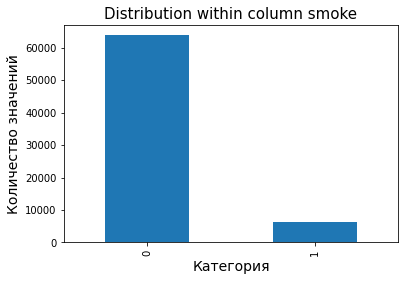

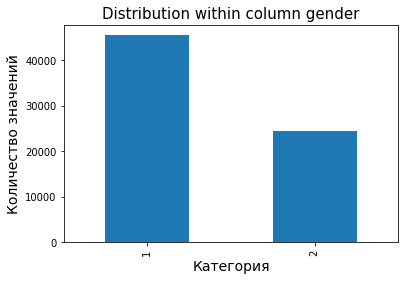

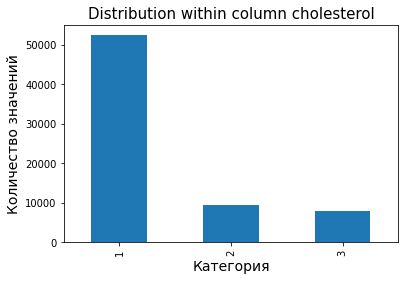

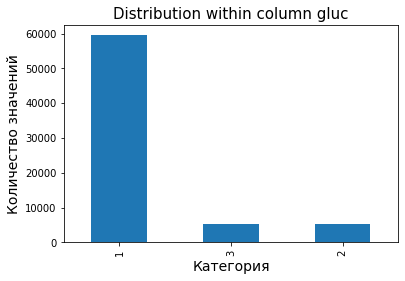

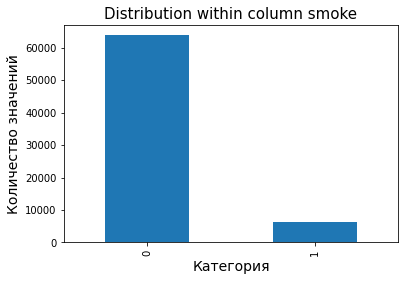

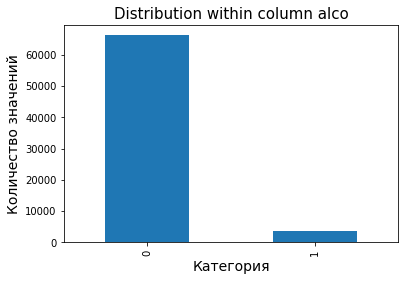

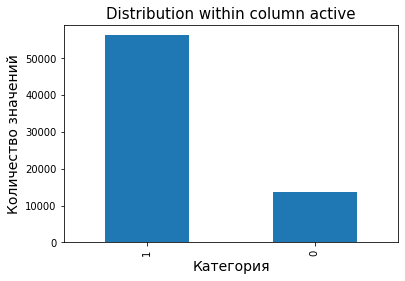

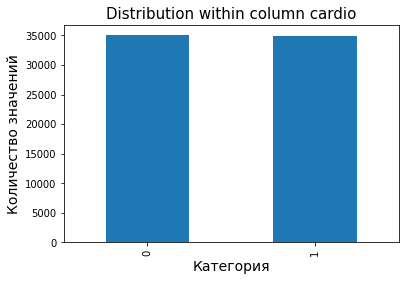

In [7]:
categorical_columns = ['smoke', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for col in categorical_columns:
    plt.title(f'Distribution within column {col}', fontsize=15)
    plt.ylabel('Количество значений', fontsize=14)
    plt.xlabel('Категория', fontsize=14)
    base[col].value_counts().plot(kind='bar')
    plt.show()

Target class is balanced. Unfortunately other attributes are highly unbalanced

## Continuous data distribution

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'age_years'}>],
       [<AxesSubplot:title={'center':'ap_lo'}>,
        <AxesSubplot:title={'center':'ap_hi'}>]], dtype=object)

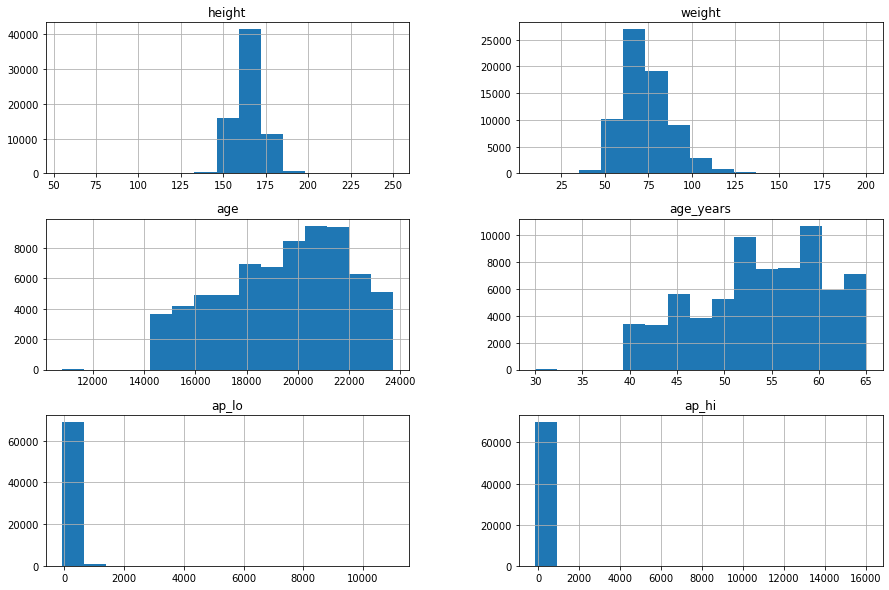

In [8]:
base['age_years'] = base['age'].apply(lambda x: math.ceil(x / 365))
base[['height', 'weight', 'age', 'age_years', 'ap_lo', 'ap_hi']].hist(figsize=(15, 10), bins=15)

As wee can see there both low and high weight and height, anomaly small age (but no high) and strange ap_lo and ap_hi distribution

- Height: it may indicate some rare values deceases
- Weight: again rare values or deceases
- Age: several persons with lower age or typos in the age
- Ap_lo and ap_hi: the usage of different scale. To check it I' ll  use scatter plot

## ap_hi and ap_lo outliers

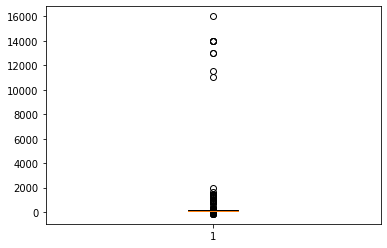

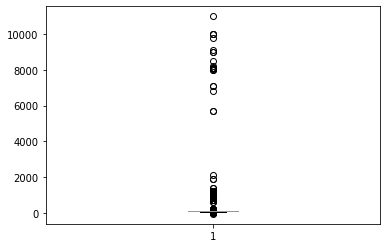

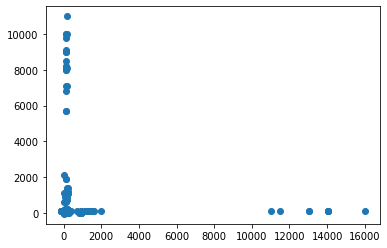

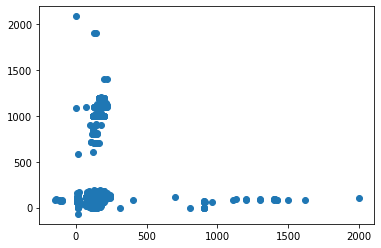

In [9]:
plt.boxplot(base['ap_hi'])
plt.show()
plt.boxplot(base['ap_lo'])
plt.show()
plt.scatter(base['ap_hi'], base['ap_lo'])
filtered = base[(base['ap_hi'] < 4000) & (base['ap_lo'] < 4000)]
plt.show()
plt.scatter(filtered['ap_hi'], filtered['ap_lo'])

<AxesSubplot:>

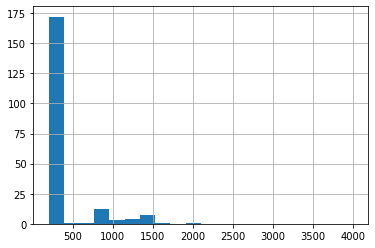

In [10]:
base['ap_hi'].hist(range=(200,4000), bins = 20)

[ 80.     90.     90.    160.    180.    190.    220.    220.    902.002]


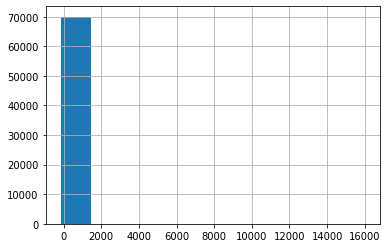

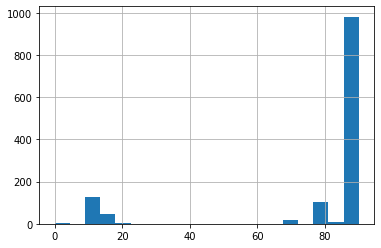

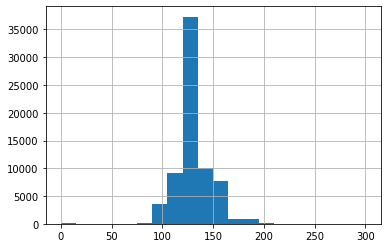

<AxesSubplot:>

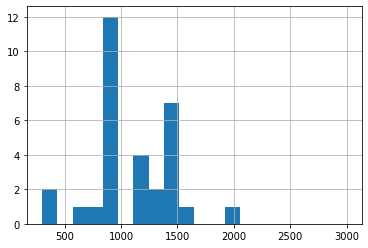

In [10]:
print(np.quantile(base['ap_hi'], [0.004, 0.005, 0.01, 0.95, 0.99, 0.995, 0.999, 0.9992, 0.9995]))
base['ap_hi'].hist()
plt.show()
base['ap_hi'].hist(range=(0, 90), bins=20)
plt.show()
base['ap_hi'].hist(range=(0, 300), bins=20)
plt.show()
base['ap_hi'].hist(range=(300, 3000), bins = 20)

[  60.      60.      60.     100.    1000.    1000.    1110.    1120.004
 1200.   ]


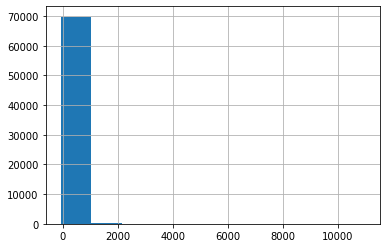

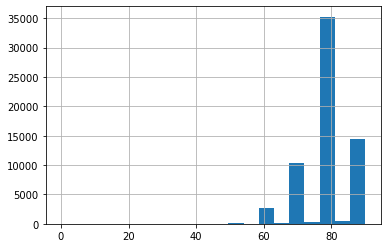

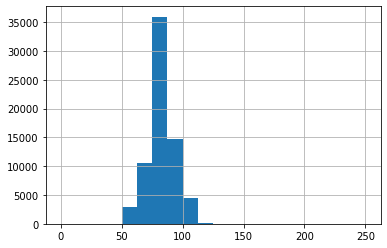

<AxesSubplot:>

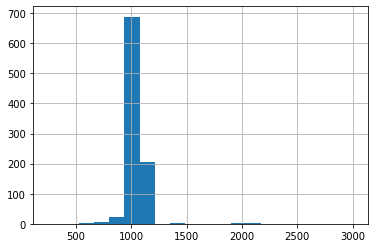

In [11]:
print(np.quantile(base['ap_lo'], [0.004, 0.005, 0.01, 0.95, 0.99, 0.995, 0.999, 0.9992, 0.9995]))
base['ap_lo'].hist()
plt.show()
base['ap_lo'].hist(range=(0, 90), bins=20)
plt.show()
base['ap_lo'].hist(range=(0, 250), bins=20)
plt.show()
base['ap_lo'].hist(range=(250, 3000), bins = 20)

In [12]:
base.query('250 >= ap_lo >= 200')
base.query('300 >= ap_hi >= 250')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years


In [13]:
base.query('200 <= ap_lo or 250 <= ap_hi')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1,48
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1,61
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1,50
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1,65
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1,64
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1,60
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1,59
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0,62


In [14]:
base_no_outliers = base.copy()

In [15]:
def filter_ap(col, lower, upper):
    return col.where((lower <= col) & (col <= upper), col.median())

base_no_outliers['ap_hi'] = filter_ap(base['ap_hi'], 40, 250)
base_no_outliers['ap_lo'] = filter_ap(base['ap_lo'], 30, 200)

array([[<AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>]], dtype=object)

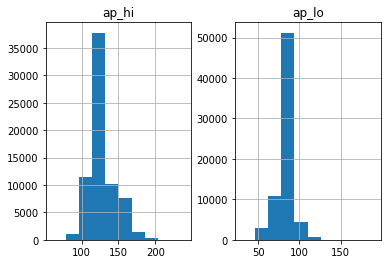

In [18]:
base_no_outliers[['ap_hi', 'ap_lo']].hist(bins=10)
# better


Let's check queantiles and examine extreme data points

In [19]:
quantiles = [0.001, 0.999]
cols = ['height', 'weight', 'age_years']
masks = []
for col in cols:
    lower, upper = np.quantile(base[col], quantiles)
    print(col, lower, upper)
    masks.append(~((lower <= base[col]) & (base[col] <= upper)))
mask = masks[0] | masks[1] | masks[2]
print(mask.sum())
# These values can be replaced by medians

height 120.0 190.0
weight 40.0 150.0
age_years 40.0 65.0
223


Text(0, 0.5, 'height')

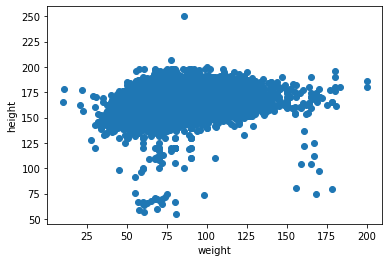

In [20]:
plt.scatter(base['weight'], base['height'])
plt.xlabel('weight')
plt.ylabel('height')

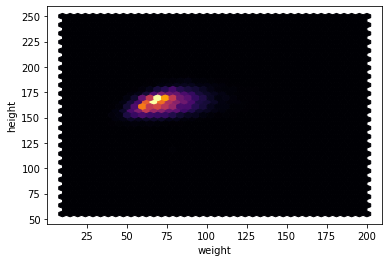

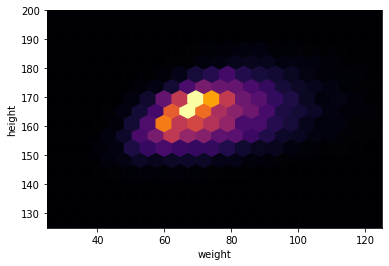

In [21]:
plt.hexbin(base['weight'], base['height'], gridsize=40, cmap='inferno')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()
plt.hexbin(base['weight'], base['height'], gridsize=40, cmap='inferno')
plt.xlabel('weight')
plt.ylabel('height')
plt.axis([25, 125, 125, 200])
plt.show()

In [22]:
quantiles = [0.001, 0.999]
cols = ['height', 'weight', 'age_years']
for col in cols:
    lower, upper = np.quantile(base[col], quantiles)
    base_no_outliers[col] = filter_ap(base[col], lower, upper)

In [23]:
base_no_outliers.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168.0,62.0,110.0,80.0,1,1,0,0,1,0,51.0
1,1,20228,1,156.0,85.0,140.0,90.0,3,1,0,0,1,1,56.0
2,2,18857,1,165.0,64.0,130.0,70.0,3,1,0,0,0,1,52.0
3,3,17623,2,169.0,82.0,150.0,100.0,1,1,0,0,1,1,49.0
4,4,17474,1,156.0,56.0,100.0,60.0,1,1,0,0,0,0,48.0


In [24]:
base_no_outliers['cholesterol'] = base_no_outliers['cholesterol'].map({ 1: 'normal', 2: 'above_normal', 3: 'high'})
base_no_outliers['gluc'] = base_no_outliers['gluc'].map({ 1: 'normal', 2: 'above_normal', 3: 'high'})

dummies = pd.get_dummies(base_no_outliers[['cholesterol','gluc']])

base_no_outliers = pd.concat([base_no_outliers, dummies],axis=1)
base_no_outliers.drop(['cholesterol','gluc'], axis=1, inplace=True)

## Train test split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


y = base_no_outliers["cardio"]
x = base_no_outliers.drop("cardio", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

# Learning and testing

In [26]:
logreg = LogisticRegression(solver='liblinear')

logreg.fit(x_train, y_train)

y_pred = pd.Series(logreg.predict(x_test))

accuracy_score(y_test,y_pred)

0.7206285714285714

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = pd.Series(clf.predict(x_test))

accuracy_score(y_test,y_pred)

0.7258857142857142

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
y_pred = pd.Series(clf.predict(x_test))

accuracy_score(y_test,y_pred)

0.7343428571428572

# Correlation

/tmp/ipykernel_2407/2512633762.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(base_no_outliers.corr(), dtype=np.bool))


<AxesSubplot:>

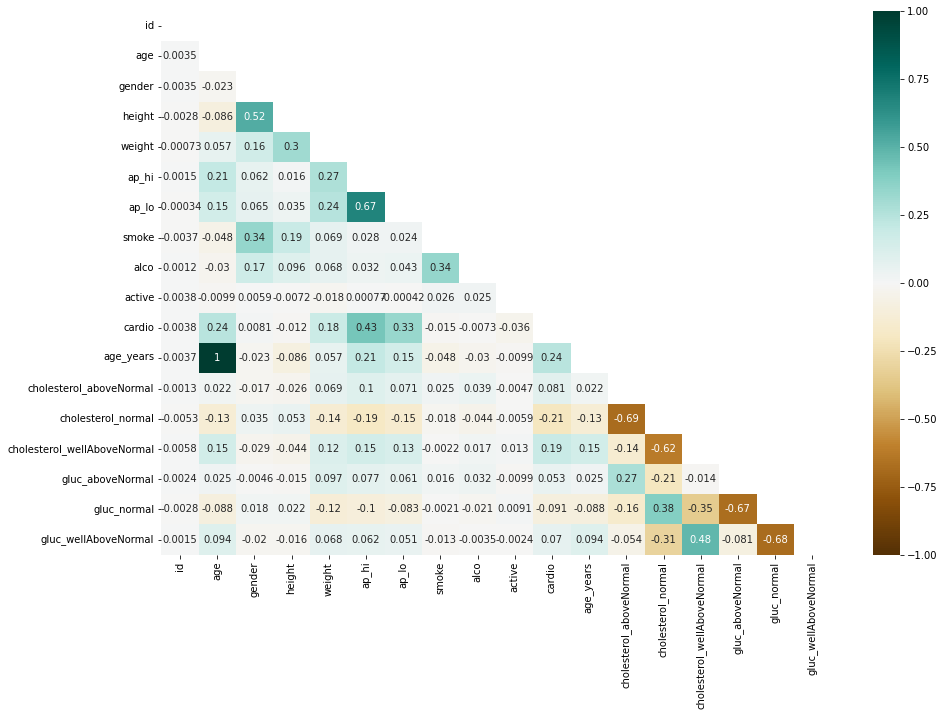

In [29]:
import seaborn as sns
plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(base_no_outliers.corr(), dtype=np.bool))
sns.heatmap(base_no_outliers.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Gender: gender code -> actual gender mapping is not given.
It is easy to check with weight and height parameters


In [41]:
base_no_outliers.groupby('gender').agg({'height': 'median', 'weight': 'median'})

,height,weight
gender,,
1,162.0,70.0
2,170.0,75.0


we can assume that gender = 1 = female, gender = 2 = male
Let's check that height and weight are received not by accident

In [48]:
from scipy.stats import ttest_ind
female = base_no_outliers.query('gender==1')
male = base_no_outliers.query('gender==2')
print(ttest_ind(female['height'], male['height']))
print(ttest_ind(female['weight'], male['weight']))
# p-value demonstrates that the difference is significant, and we can not assume that female's and male's parameters are the same

Ttest_indResult(statistic=-159.90600927956075, pvalue=0.0)
Ttest_indResult(statistic=-42.05525795488029, pvalue=0.0)


In [52]:
print(ttest_ind(female['cardio'], male['cardio']))
print(ttest_ind(female['active'], male['active']))
# means of some other parameters like 'active' are same for both genders

Ttest_indResult(statistic=-2.1456097878536307, pvalue=0.031907552773620104)
Ttest_indResult(statistic=-1.551914732330334, pvalue=0.12068714830943524)


In [53]:
gender_to_label = {1: 'female', 2: 'male'}

## How weight depends on age

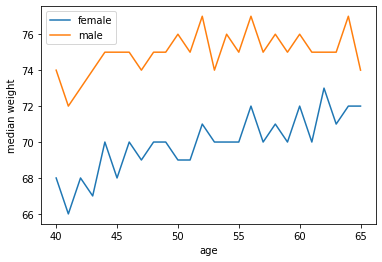

In [54]:
weight_summary = base_no_outliers.groupby(['gender', 'age_years'])['weight'].median().reset_index()
for gender, gender_group in weight_summary.groupby('gender'):
    plt.plot(gender_group['age_years'], gender_group['weight'], label=gender_to_label.get(gender))
    plt.xlabel('age')
    plt.ylabel('median weight')
    plt.legend()
# Females tends to gain weight

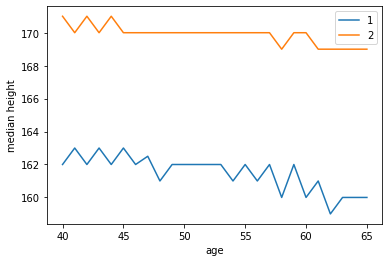

In [55]:
weight_summary = base_no_outliers.groupby(['gender', 'age_years'])['height'].median().reset_index()
for gender, gender_group in weight_summary.groupby('gender'):
    plt.plot(gender_group['age_years'], gender_group['height'], label=gender)
    plt.xlabel('age')
    plt.ylabel('median height')
    plt.legend()

# Appendix
There are some ideas that may be used further

In [35]:
weight_summary

,gender,age_years,weight
0,1,40.0,68.0
1,1,41.0,66.0
2,1,42.0,68.0
3,1,43.0,67.0
4,1,44.0,70.0
5,1,45.0,68.0
6,1,46.0,70.0
7,1,47.0,69.0
8,1,48.0,70.0
9,1,49.0,70.0


In [31]:
year_weight

age_years_ceil
30    70.000000
31    59.000000
40    72.290828
41    70.895421
42    72.915167
43    71.664108
44    73.936729
45    72.784963
46    74.350334
47    72.725449
48    74.680714
49    74.182135
50    73.919534
51    73.072662
52    75.086514
53    73.435960
54    74.629504
55    73.996567
56    75.263497
57    74.263474
58    75.107228
59    74.632772
60    75.340244
61    74.010013
62    75.714755
63    74.031499
64    75.867990
65    74.620579
Name: weight, dtype: float64

In [32]:
min_, max_ = year_weight.min(), year_weight.max(),

In [33]:
max_/min_

1.285898132260175

# Q2

In [45]:
old_chol = df[df['age_years_ceil'] >= 50]['cholesterol'].mean(); young_chol = df[df['age_years_ceil'] < 50]['cholesterol'].mean()

In [46]:
old_chol, young_chol

(1.4145211221566327, 1.229144667370644)

In [47]:
(old_chol - young_chol) / young_chol

0.15081744216695123

# Q3

In [56]:
df.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,age_years_ceil
gender,,,,,,,,,,
1,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,0.017856,53.452396,53.951724
2,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,0.218880,53.129035,53.626154


In [58]:
df['smoke']

0        0
1        0
2        0
3        0
4        0
        ..
69995    1
69996    0
69997    0
69998    0
69999    0
Name: smoke, Length: 70000, dtype: int64

In [ ]:
# 1 - female, 2 - male

In [57]:
0.21888 / 0.017856

12.258064516129032

# Q4

In [65]:
df.sort_values(by='height')['height'].quantile(0.99, interpolation='lower')

184

# Q5

In [67]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,age_years_ceil
0,0,18393,2,168,62.0,110,80,1,0,50.391781,51
1,1,20228,1,156,85.0,140,90,3,0,55.419178,56
2,2,18857,1,165,64.0,130,70,3,0,51.663014,52
3,3,17623,2,169,82.0,150,100,1,0,48.282192,49
4,4,17474,1,156,56.0,100,60,1,0,47.873973,48
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,52.712329,53
69996,99995,22601,1,158,126.0,140,90,2,0,61.920548,62
69997,99996,19066,2,183,105.0,180,90,3,0,52.235616,53
69998,99998,22431,1,163,72.0,135,80,1,0,61.454795,62


In [69]:
from scipy.stats import spearmanr
print(spearmanr(df['age'], df['weight']))
print(spearmanr(df['age'], df['ap_hi']))
print(spearmanr(df['age'], df['ap_lo']))
print(spearmanr(df['ap_hi'], df['ap_lo']))
print(spearmanr(df['gender'], df['height']))

SpearmanrResult(correlation=0.06155893830937044, pvalue=9.530452400650349e-60)
SpearmanrResult(correlation=0.21908652588163746, pvalue=0.0)
SpearmanrResult(correlation=0.1566995260636921, pvalue=0.0)
SpearmanrResult(correlation=0.7354361051379776, pvalue=0.0)
SpearmanrResult(correlation=0.5338045129524459, pvalue=0.0)


# Q6

In [74]:
height_avg = df['height'].mean()

In [75]:
height_std = df['height'].std()

In [82]:
df.count()

id                70000
age               70000
gender            70000
height            70000
weight            70000
ap_hi             70000
ap_lo             70000
cholesterol       70000
smoke             70000
age_years         70000
age_years_ceil    70000
dtype: int64

In [79]:
print(df[df['height'] > height_avg + 2 * height_std].count())
print(df[df['height'] < height_avg - 2 * height_std].count())

id                1439
age               1439
gender            1439
height            1439
weight            1439
ap_hi             1439
ap_lo             1439
cholesterol       1439
smoke             1439
age_years         1439
age_years_ceil    1439
dtype: int64
id                896
age               896
gender            896
height            896
weight            896
ap_hi             896
ap_lo             896
cholesterol       896
smoke             896
age_years         896
age_years_ceil    896
dtype: int64


In [80]:
(1439 + 896) / 70000

0.033357142857142856

# Q7
consume alcohol

In [96]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,age_years_ceil
0,0,18393,2,168,62.0,110,80,1,0,50.391781,51
1,1,20228,1,156,85.0,140,90,3,0,55.419178,56
2,2,18857,1,165,64.0,130,70,3,0,51.663014,52
3,3,17623,2,169,82.0,150,100,1,0,48.282192,49
4,4,17474,1,156,56.0,100,60,1,0,47.873973,48
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,52.712329,53
69996,99995,22601,1,158,126.0,140,90,2,0,61.920548,62
69997,99996,19066,2,183,105.0,180,90,3,0,52.235616,53
69998,99998,22431,1,163,72.0,135,80,1,0,61.454795,62


In [97]:
df_alco = df.merge(alco, on='id')
over_50 = df_alco[df_alco['age_years_ceil'] >= 50]

In [98]:
over_50.count()

id                42311
age               42311
gender            42311
height            42311
weight            42311
ap_hi             42311
ap_lo             42311
cholesterol       42311
smoke             42311
age_years         42311
age_years_ceil    42311
alco              42311
dtype: int64

In [99]:
over_50.groupby('alco').count()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,age_years_ceil
alco,,,,,,,,,,,
0,40189,40189,40189,40189,40189,40189,40189,40189,40189,40189,40189
1,2122,2122,2122,2122,2122,2122,2122,2122,2122,2122,2122


In [100]:
2122 / 42311

0.05015244262721278

# Q8

In [106]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,age_years_ceil
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129,53.339358,53.837914
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484,6.759594,6.766821
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,29.583562,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,48.394521,49.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,53.980822,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,58.430137,59.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,64.967123,65.000000


In [108]:
from scipy.stats import ttest_ind
smokers = df[df['smoke'] == 1]
no_smokers = df[df['smoke'] == 0]
print(smokers['ap_hi'].mean(),  no_smokers['ap_hi'].mean())
print(smokers['ap_hi'].mean() > no_smokers['ap_hi'].mean())
print(smokers['ap_lo'].mean(),  no_smokers['ap_lo'].mean())
print(smokers['ap_lo'].mean() > no_smokers['ap_lo'].mean())
ttest_ind(smokers['ap_lo'], no_smokers['ap_lo'])

128.36051223861242 128.86143096614498
False
99.77451775004053 96.32654979555389
True


Ttest_indResult(statistic=1.372119976655746, pvalue=0.1700304886397662)

In [109]:
second

NameError: name 'second' is not defined

In [118]:
print(smokers['cholesterol'].mean(),  no_smokers['cholesterol'].mean())
print(smokers['cholesterol'].mean() > no_smokers['cholesterol'].mean())
ttest_ind(smokers['cholesterol'], no_smokers['cholesterol'], alternative='greater')

1.3895282865942615 1.3646817377136502
True


Ttest_indResult(statistic=2.7396284742488923, pvalue=0.0030762122067996426)

In [116]:
print(smokers['weight'].mean(),  no_smokers['weight'].mean())
print(smokers['weight'].mean() < no_smokers['weight'].mean())
ttest_ind(smokers['weight'], no_smokers['weight'])

77.34435078618901 73.90235152198775
False


Ttest_indResult(statistic=17.974105126565, pvalue=4.517830901143157e-72)

In [120]:
male = df[df['gender'] == 2]
female = df[df['gender'] == 1]
print(male['ap_hi'].mean(),  female['ap_hi'].mean())
print(male['ap_hi'].mean() > female['ap_hi'].mean())
print(ttest_ind(male['ap_hi'], female['ap_hi'], alternative='greater'))
print(male['ap_lo'].mean(),  female['ap_lo'].mean())
print(male['ap_lo'].mean() > female['ap_lo'].mean())
print(ttest_ind(male['ap_lo'], female['ap_lo'], alternative='greater'))

130.07887208827134 128.1392488469141
True
Ttest_indResult(statistic=1.5888612549671324, pvalue=0.05604811829621948)
100.55198201879853 94.52277619152207
True
Ttest_indResult(statistic=4.036233375474579, pvalue=2.7186944123696598e-05)


# Covid dataset

# Q9

In [121]:
df = covid.copy()

In [128]:
df

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [129]:
germany = df[df['location'] == 'Germany']
germany['total_cases'] = germany.sort_values(by='date')['new_cases'].cumsum()
germany

/tmp/ipykernel_59325/1652195514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany['total_cases'] = germany.sort_values(by='date')['new_cases'].cumsum()


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,total_cases
7914,Germany,2019-12-31,0,0,83783945.0,21.453,45229.245,8.0,0
7915,Germany,2020-01-01,0,0,83783945.0,21.453,45229.245,8.0,0
7916,Germany,2020-01-02,0,0,83783945.0,21.453,45229.245,8.0,0
7917,Germany,2020-01-03,0,0,83783945.0,21.453,45229.245,8.0,0
7918,Germany,2020-01-04,0,0,83783945.0,21.453,45229.245,8.0,0
...,...,...,...,...,...,...,...,...,...
8072,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678
8073,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979
8074,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193
8075,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543


In [130]:
italy = df[df['location'] == 'Italy']
italy['total_cases'] = italy.sort_values(by='date')['new_cases'].cumsum()
italy

/tmp/ipykernel_59325/2990809048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy['total_cases'] = italy.sort_values(by='date')['new_cases'].cumsum()


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,total_cases
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18,0
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18,0
10690,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18,0
10691,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18,0
10692,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18,0
...,...,...,...,...,...,...,...,...,...
10846,Italy,2020-06-06,518,85,60461828.0,23.021,35220.084,3.18,234531
10847,Italy,2020-06-07,270,72,60461828.0,23.021,35220.084,3.18,234801
10848,Italy,2020-06-08,197,53,60461828.0,23.021,35220.084,3.18,234998
10849,Italy,2020-06-09,280,65,60461828.0,23.021,35220.084,3.18,235278


In [131]:
italy_german_diff = germany.merge(italy, on = 'date', suffixes=('_ge', '_it'))

In [133]:
italy_german_diff['diff'] = (italy_german_diff['total_cases_it'] - italy_german_diff['total_cases_ge']).abs()

In [136]:
italy_german_diff[italy_german_diff['diff'] >= 10000]

,location_ge,date,new_cases_ge,new_deaths_ge,population_ge,aged_65_older_percent_ge,gdp_per_capita_ge,hospital_beds_per_thousand_ge,total_cases_ge,location_it,new_cases_it,new_deaths_it,population_it,aged_65_older_percent_it,gdp_per_capita_it,hospital_beds_per_thousand_it,total_cases_it,diff
72,Germany,2020-03-12,271,1,83783945.0,21.453,45229.245,8.0,1567,Italy,2313,196,60461828.0,23.021,35220.084,3.18,12462,10895
73,Germany,2020-03-13,802,2,83783945.0,21.453,45229.245,8.0,2369,Italy,2651,189,60461828.0,23.021,35220.084,3.18,15113,12744
74,Germany,2020-03-14,693,0,83783945.0,21.453,45229.245,8.0,3062,Italy,2547,252,60461828.0,23.021,35220.084,3.18,17660,14598
75,Germany,2020-03-15,733,3,83783945.0,21.453,45229.245,8.0,3795,Italy,3497,173,60461828.0,23.021,35220.084,3.18,21157,17362
76,Germany,2020-03-16,1043,4,83783945.0,21.453,45229.245,8.0,4838,Italy,2823,370,60461828.0,23.021,35220.084,3.18,23980,19142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Germany,2020-06-06,407,33,83783945.0,21.453,45229.245,8.0,183678,Italy,518,85,60461828.0,23.021,35220.084,3.18,234531,50853
159,Germany,2020-06-07,301,22,83783945.0,21.453,45229.245,8.0,183979,Italy,270,72,60461828.0,23.021,35220.084,3.18,234801,50822
160,Germany,2020-06-08,214,6,83783945.0,21.453,45229.245,8.0,184193,Italy,197,53,60461828.0,23.021,35220.084,3.18,234998,50805
161,Germany,2020-06-09,350,37,83783945.0,21.453,45229.245,8.0,184543,Italy,280,65,60461828.0,23.021,35220.084,3.18,235278,50735


In [137]:
italy

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,total_cases
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18,0
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18,0
10690,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18,0
10691,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18,0
10692,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18,0
...,...,...,...,...,...,...,...,...,...
10846,Italy,2020-06-06,518,85,60461828.0,23.021,35220.084,3.18,234531
10847,Italy,2020-06-07,270,72,60461828.0,23.021,35220.084,3.18,234801
10848,Italy,2020-06-08,197,53,60461828.0,23.021,35220.084,3.18,234998
10849,Italy,2020-06-09,280,65,60461828.0,23.021,35220.084,3.18,235278


In [139]:
italy_interval = italy[(italy['date'] >= '2020-02-28') & (italy['date'] <= '2020-03-20')]

In [140]:
italy_interval.dtypes

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
total_cases                     int64
dtype: object

In [145]:
italy_interval['date_'] = pd.to_datetime(italy_interval['date'])
start_date = italy_interval['date_'].min()


/tmp/ipykernel_59325/1802390285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_interval['date_'] = pd.to_datetime(italy_interval['date'])


In [147]:
italy_interval['days'] = (italy_interval['date_'] - start_date).dt.days

/tmp/ipykernel_59325/1054508390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_interval['days'] = (italy_interval['date_'] - start_date).dt.days


In [153]:
italy_interval['total_cases_new'] = italy_interval.sort_values(by='date_')['new_cases'].cumsum()

/tmp/ipykernel_59325/3715085205.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_interval['total_cases_new'] = italy_interval.sort_values(by='date_')['new_cases'].cumsum()


In [157]:
italy_interval['total_cases_new']

10747      250
10748      488
10749      728
10750     1289
10751     1636
10752     2102
10753     2689
10754     3458
10755     4236
10756     5483
10757     6975
10758     8772
10759     9749
10760    12062
10761    14713
10762    17260
10763    20757
10764    23580
10765    27580
10766    31106
10767    35313
10768    40635
Name: total_cases_new, dtype: int64

In [167]:
from scipy.optimize import curve_fit
def exp_func(x, a, b):
    return a * np.exp(b * x)
popt, pcov = curve_fit(exp_func, italy_interval['days'], italy_interval['total_cases'])

In [168]:
popt

array([1.61382416e+03, 1.55878443e-01])

In [169]:
italy_interval['predicted'] = italy_interval['days'].apply(lambda x: exp_func(x, 1473.738636, 0.159909))
italy_interval['predicted'] = italy_interval['days'].apply(lambda x: exp_func(x, 1613.824158, 0.155878))

/tmp/ipykernel_59325/2969111502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_interval['predicted'] = italy_interval['days'].apply(lambda x: exp_func(x, 1473.738636, 0.159909))
/tmp/ipykernel_59325/2969111502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_interval['predicted'] = italy_interval['days'].apply(lambda x: exp_func(x, 1613.824158, 0.155878))


In [170]:
italy_interval

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,total_cases,date_,days,total_cases_new,predicted
10747,Italy,2020-02-28,250,5,60461828.0,23.021,35220.084,3.18,650,2020-02-28,0,250,1613.824158
10748,Italy,2020-02-29,238,4,60461828.0,23.021,35220.084,3.18,888,2020-02-29,1,488,1886.049851
10749,Italy,2020-03-01,240,8,60461828.0,23.021,35220.084,3.18,1128,2020-03-01,2,728,2204.195558
10750,Italy,2020-03-02,561,6,60461828.0,23.021,35220.084,3.18,1689,2020-03-02,3,1289,2576.007233
10751,Italy,2020-03-03,347,17,60461828.0,23.021,35220.084,3.18,2036,2020-03-03,4,1636,3010.537445
10752,Italy,2020-03-04,466,28,60461828.0,23.021,35220.084,3.18,2502,2020-03-04,5,2102,3518.365784
10753,Italy,2020-03-05,587,27,60461828.0,23.021,35220.084,3.18,3089,2020-03-05,6,2689,4111.856444
10754,Italy,2020-03-06,769,41,60461828.0,23.021,35220.084,3.18,3858,2020-03-06,7,3458,4805.459253
10755,Italy,2020-03-07,778,49,60461828.0,23.021,35220.084,3.18,4636,2020-03-07,8,4236,5616.061491
10756,Italy,2020-03-08,1247,36,60461828.0,23.021,35220.084,3.18,5883,2020-03-08,9,5483,6563.399046


In [171]:
42346.740903 - 40635
42608.110222 - 41035

1573.110222000003

In [172]:
italy['tot']

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,total_cases
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18,0
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18,0
10690,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18,0
10691,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18,0
10692,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18,0
...,...,...,...,...,...,...,...,...,...
10846,Italy,2020-06-06,518,85,60461828.0,23.021,35220.084,3.18,234531
10847,Italy,2020-06-07,270,72,60461828.0,23.021,35220.084,3.18,234801
10848,Italy,2020-06-08,197,53,60461828.0,23.021,35220.084,3.18,234998
10849,Italy,2020-06-09,280,65,60461828.0,23.021,35220.084,3.18,235278


# Q11

In [203]:
covid = read_data('data/covid_data.csv')
df = covid.copy()

File path: data/covid_data.csv
Read successfully
Data types location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object


In [202]:
death_stats = df.groupby('location').agg({'population': 'max', 'new_deaths': 'sum'}).reset_index()

In [185]:
death_stats['population_'] = death_stats['population'].apply(lambda x: x // 1000000)

In [186]:
death_stats['ratio'] = death_stats['new_deaths'] / (death_stats['population'] * 1000000)
death_stats['ratio_'] = death_stats['new_deaths'] / death_stats['population_']

In [187]:
death_stats.sort_values(by='ratio')

,location,population,new_deaths,ratio,population_,ratio_
162,Saint Vincent and the Grenadines,110947.0,0,0.000000e+00,0.0,NaN
168,Seychelles,98340.0,0,0.000000e+00,0.0,NaN
55,Dominica,71991.0,0,0.000000e+00,0.0,NaN
161,Saint Lucia,183629.0,0,0.000000e+00,0.0,NaN
61,Eritrea,3546427.0,0,0.000000e+00,3.0,0.000000
...,...,...,...,...,...,...
199,United Kingdom,67886004.0,40883,6.022302e-10,67.0,610.194030
3,Andorra,77265.0,51,6.600660e-10,0.0,inf
18,Belgium,11589616.0,9619,8.299671e-10,11.0,874.454545
163,San Marino,33938.0,42,1.237551e-09,0.0,inf


In [188]:
death_stats.sort_values(by='ratio_')

,location,population,new_deaths,ratio,population_,ratio_
108,Laos,7275556.0,0,0.0,7.0,0.0
206,Vietnam,97338583.0,0,0.0,97.0,0.0
196,Uganda,45741000.0,0,0.0,45.0,0.0
190,Timor,1318442.0,0,0.0,1.0,0.0
61,Eritrea,3546427.0,0,0.0,3.0,0.0
...,...,...,...,...,...,...
160,Saint Kitts and Nevis,53192.0,0,0.0,0.0,NaN
161,Saint Lucia,183629.0,0,0.0,0.0,NaN
162,Saint Vincent and the Grenadines,110947.0,0,0.0,0.0,NaN
168,Seychelles,98340.0,0,0.0,0.0,NaN


In [191]:
covid.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')

In [205]:
df = covid[covid['hospital_beds_per_thousand'] >= 5]

In [209]:
df['is_gdb_high'] = df['gdp_per_capita'].apply(lambda x: 1 if x >= 10000 else 0)

/tmp/ipykernel_59325/841260019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_gdb_high'] = df['gdp_per_capita'].apply(lambda x: 1 if x >= 10000 else 0)


In [216]:
df.groupby('location')['is_gdb_high'].first().reset_index().sort_values('is_gdb_high')

,location,is_gdb_high
27,Ukraine,0
7,Cuba,0
18,Monaco,0
17,Moldova,0
26,Timor,0
25,South Korea,1
24,Slovakia,1
23,Serbia,1
22,Russia,1
21,Romania,1


In [217]:
23/28

0.8214285714285714